In [84]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
import numpy as np
a = [1,2,3,4,5]
b = [2,3,4,5,6]
ary = []
for i in range(0, len(a)):
    ary.append(a[i] + b[i])
print ary
print type(ary)


[3, 5, 7, 9, 11]
<type 'list'>


In [5]:
a = np.array([0,1,2,3,4,5])
print type(a)
print a, a.ndim, a.shape

<type 'numpy.ndarray'>
[0 1 2 3 4 5] 1 (6L,)


In [10]:
a = np.array([0,1,2,3,4,5])
b = np.array([2,3,4,5,6,7])
print a+b
print a-b
print a*b
print a * 1.0 /b

[ 2  4  6  8 10 12]
[-2 -2 -2 -2 -2 -2]
[ 0  3  8 15 24 35]
[ 0.          0.33333333  0.5         0.6         0.66666667  0.71428571]


In [11]:
a = np.array([0,1,2,3,4,5])
b = a.reshape((3,2))
print b, b.ndim, b.shape

[[0 1]
 [2 3]
 [4 5]] 2 (3L, 2L)


In [16]:
print b
print b[1][0]
#= 77
b[1][0] = 77
print b
print b
print a


[[ 0  1]
 [77  3]
 [ 4  5]]
77
[[ 0  1]
 [77  3]
 [ 4  5]]
[[ 0  1]
 [77  3]
 [ 4  5]]
[ 0  1 77  3  4  5]


In [18]:
a = np.array([0,1,2,3,4,5])
c = a.reshape((3,2)).copy()
print c
c[0][0] = -99
print a
print c


[[0 1]
 [2 3]
 [4 5]]
[0 1 2 3 4 5]
[[-99   1]
 [  2   3]
 [  4   5]]


In [19]:
a = np.array([0,1,2,3,4,5])
print a *2
print a **2

b = [1,2,3,4,5]
print b * 2
print b ** 2


[ 0  2  4  6  8 10]
[ 0  1  4  9 16 25]
[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [29]:
a = np.array([0,1,2,3,4,5])
print a[np.array([2,3,4])] # filter value by position 

print a > 4
print a[a>4] # filter value by logic 
a[a>4] = 4
print a

print a
print a.clip(0,3)
print a.clip(1,3)
#help(a.clip)


[2 3 4]
[False False False False False  True]
[5]
[0 1 2 3 4 4]
[0 1 2 3 4 4]
[0 1 2 3 3 3]
[1 1 2 3 3 3]


In [30]:
c = np.array([1,2,np.NAN, 3, 4])
print c
print np.isnan(c)
print c[-np.isnan(c)]
print np.mean(c[-np.isnan(c)])

[  1.   2.  nan   3.   4.]
[False False  True False False]
[ 1.  2.  3.  4.]
2.5


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


In [31]:
np.array([1,"string"])
np.array([1,"string", set([1,2,3])])


array([1, 'string', set([1, 2, 3])], dtype=object)

In [39]:
import os
import scipy as sp
import matplotlib.pyplot as plt
#?sp.genfromtxt
data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")
print type(data)
print data[1:3]
print(data[:10])


<type 'numpy.ndarray'>
[[    2.    nan]
 [    3.  1386.]]
[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]


In [46]:
# fix invalid entries
x = data[:, 0]
y = data[:, 1]

print data[0:3,]
print data[0:3,0]
#print x
#print sp.isnan(y)
print sp.sum(sp.isnan(y))

print("Number of invalid entries:", sp.sum(sp.isnan(y)))
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]]
[ 1.  2.  3.]
8
('Number of invalid entries:', 8)


In [48]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


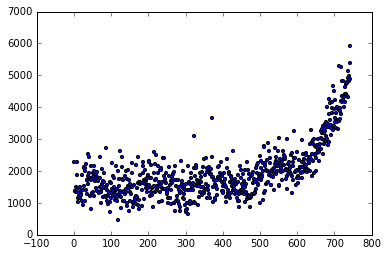

In [49]:
plt.clf()
plt.scatter(x, y, s=10)

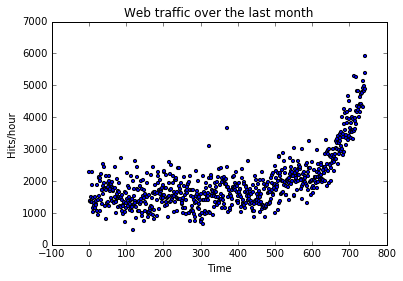

In [50]:
plt.clf()

plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.scatter(x, y, s=10)

In [51]:
fp1, res, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
print("Model parameters: %s" % fp1)
print("Error of the model:", res)

Model parameters: [   2.59619213  989.02487106]
('Error of the model:', array([  3.17389767e+08]))


In [66]:
# plot function for input data
colors = ['g', 'k', 'b', 'm', 'r']
#linestyles = ['-', '-.', '--', ':', '-']
linestyles = '-' * 5 

def plot_models(x, y, models, mx=None, ymax=None, xmin=None):
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ["week %i" % w for w in range(10)])
    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
        plt.legend(["d=%i" % m.order for m in models], loc="upper left")
    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')


C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:586: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


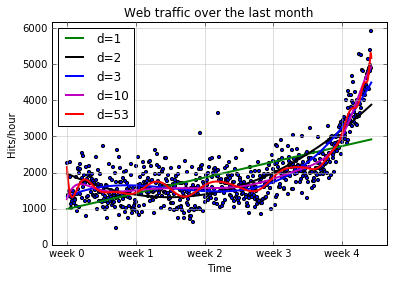

In [68]:
f1 = sp.poly1d(sp.polyfit(x, y, 1))
f2 = sp.poly1d(sp.polyfit(x, y, 2))
f3 = sp.poly1d(sp.polyfit(x, y, 3))
f10 = sp.poly1d(sp.polyfit(x, y, 10))
f100 = sp.poly1d(sp.polyfit(x, y, 100))
#plot_models(x, y, [f1])
plot_models(x, y, [f1, f2, f3, f10, f100])

In [80]:
fp1, res, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
print("Error of the model:", res)

fp1, res, rank, sv, rcond = sp.polyfit(x, y, 10, full=True)
print("Error of the model:", res)

fp1, res, rank, sv, rcond = sp.polyfit(x, y, 15, full=True)
print("Error of the model:", res)

('Error of the model:', array([  3.17389767e+08]))
('Error of the model:', array([  1.21942326e+08]))
('Error of the model:', array([  1.12482231e+08]))


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


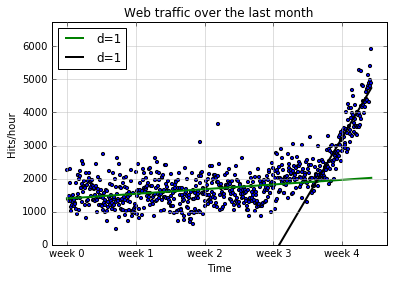

In [81]:
# using inflection point for plotting 
inflection = 3.5 * 7 * 24
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

plot_models(x, y, [fa, fb])

In [86]:
from sklearn import datasets
#print dir(datasets)
# Load Dataset iris

iris = datasets.load_iris()
#print dir(iris)
iris.data[0:5], iris.target[0:5]


(array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2]]), array([0, 0, 0, 0, 0]))

In [87]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)


In [100]:
print iris.data[1,]

[ 4.9  3.   1.4  0.2]


In [101]:
clf.predict(iris.data[1,])

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])

In [91]:
pred = clf.predict(iris.data)

In [102]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(iris.target, pred) 
print cm

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [131]:
def getdetail(url , title, category, cur):
    res = requests.get(url)
    soup = BeautifulSoup(res.text)
    dic = {"summary":soup.select('#summary')[0].text,
           "title": title,
           "category": category
    }
    sql = "insert into news_main({}) values({})"
    sql2 = sql.format(','.join(dic.keys()), ','.join(len(dic) * '?'))
    cur.execute(sql2, dic.values())
    

In [133]:
import requests
import sqlite3 
con = sqlite3.connect('news.sqlite')
cur = con.cursor()
cur.execute("""drop table news_main;""")
cur.execute("""create table news_main(summary text, title text, category varchar(20));""")
con.commit()
from bs4 import BeautifulSoup
domain = 'http://www.appledaily.com.tw'
for page in range(1,30):
    res = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/' + str(page))
    soup = BeautifulSoup(res.text)
    for rtddt in soup.select('.rtddt'):
        title = rtddt.select('h1')[0].text
        category = rtddt.select('h2')[0].text
        url = domain + rtddt.select('a')[0]['href'] 
        getdetail(url , title, category, cur)
        con.commit()
con.close()

In [9]:
import jieba
import re
ele =  jieba.cut('為節能減碳，中央今年將線上簽核目公文的目標訂在45％，但柯市府希望更上一層樓，自行設定65％的高標，但此舉引來底下局處抱怨，台北市長柯文哲今受訪表示，他認為這叫做盡力，他不贊成政策設一條線要求大家一定要這樣，但就是設一個方向讓大家努力，他認為公務員就是把目標設定在那裡死板板的，所以常造成行政上困擾。')
for e in ele:
    m = re.match(ur"[\u4e00-\u9fa5]+", e)
    if m:
        print e

為
節能
減碳
中央
今年
將線
上
簽核目
公文
的
目標訂
在
但柯
市府
希望
更上
一層
樓
自行
設定
的
高標
但
此舉
引來
底下
局處
抱怨
台北市
長
柯文
哲今
受訪
表示
他
認為
這
叫做
盡力
他
不
贊成
政策
設一
條線
要求
大家
一定
要
這樣
但
就是
設一個
方向
讓
大家
努力
他
認為
公務員
就是
把
目標
設定
在
那裡
死板板
的
所以
常
造成
行政
上
困擾


In [34]:
from sklearn.feature_extraction.text import CountVectorizer

ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
'留洪智坤 柯：殘障求職不易',
'人事處議處洪智坤　柯P：不清楚議處結果']
corpus = []
for title in ary:
    corpus.append('|'.join(jieba.cut(title)))
print corpus[0]  
print corpus[1]  
print corpus[2]  
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names() 
for w in word:
    print w,
print 
print X.toarray()

【|更新|】|柯|P|：|洪智坤|洩漏|公文|案還|沒|看到|公文|　|今處理
留洪智坤| |柯|：|殘障|求職|不易
人事|處議|處|洪智坤|　|柯|P|：|不|清楚|議處|結果
不易 人事 今處理 公文 更新 案還 殘障 求職 洩漏 洪智坤 清楚 留洪智坤 看到 結果 處議 議處
[[0 0 1 2 1 1 0 0 1 1 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1]]


In [1]:
import sqlite3 
import jieba
con = sqlite3.connect('news.sqlite')
cur = con.cursor()
data = cur.execute("""select * from news_main;""")
corpus = []
tags = []
for rec in data:
    if (rec[2] == '娛樂'.decode('utf-8')) or \
        (rec[2] == '社會'.decode('utf-8')) or \
        (rec[2] == '財經'.decode('utf-8')):
        summary = rec[0]
        corpus.append(' '.join(jieba.cut(summary)))
        tags.append(rec[2]) 

con.close()

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
DEBUG:jieba:Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
Loading model cost 0.492 seconds.
DEBUG:jieba:Loading model cost 0.492 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


In [2]:
from collections import Counter
dic = Counter()
for ele in tags:
    dic[ele] +=1
for ele in dic.most_common(3):
    print ele[0], ele[1]

社會 105
娛樂 78
財經 68


In [3]:
import jieba
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names() 

In [4]:
#for w in word:
#    print w,
#print 

In [5]:
from sklearn.cross_validation import train_test_split
train_data, test_data, train_tag, test_tag = train_test_split(X, tags, test_size=0.30, random_state=42)

In [6]:
print len(train_tag)
print len(test_tag)

175
76


In [7]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.01)
clf.fit(train_data,train_tag)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [8]:
pred = clf.predict(test_data)
print pred

[u'\u793e\u6703' u'\u5a1b\u6a02' u'\u793e\u6703' u'\u8ca1\u7d93'
 u'\u8ca1\u7d93' u'\u8ca1\u7d93' u'\u793e\u6703' u'\u8ca1\u7d93'
 u'\u793e\u6703' u'\u8ca1\u7d93' u'\u8ca1\u7d93' u'\u793e\u6703'
 u'\u793e\u6703' u'\u793e\u6703' u'\u793e\u6703' u'\u793e\u6703'
 u'\u5a1b\u6a02' u'\u793e\u6703' u'\u8ca1\u7d93' u'\u793e\u6703'
 u'\u8ca1\u7d93' u'\u793e\u6703' u'\u5a1b\u6a02' u'\u793e\u6703'
 u'\u8ca1\u7d93' u'\u8ca1\u7d93' u'\u793e\u6703' u'\u793e\u6703'
 u'\u8ca1\u7d93' u'\u5a1b\u6a02' u'\u5a1b\u6a02' u'\u8ca1\u7d93'
 u'\u8ca1\u7d93' u'\u8ca1\u7d93' u'\u5a1b\u6a02' u'\u8ca1\u7d93'
 u'\u8ca1\u7d93' u'\u5a1b\u6a02' u'\u5a1b\u6a02' u'\u8ca1\u7d93'
 u'\u8ca1\u7d93' u'\u793e\u6703' u'\u793e\u6703' u'\u793e\u6703'
 u'\u793e\u6703' u'\u793e\u6703' u'\u5a1b\u6a02' u'\u8ca1\u7d93'
 u'\u8ca1\u7d93' u'\u5a1b\u6a02' u'\u8ca1\u7d93' u'\u8ca1\u7d93'
 u'\u8ca1\u7d93' u'\u8ca1\u7d93' u'\u8ca1\u7d93' u'\u5a1b\u6a02'
 u'\u5a1b\u6a02' u'\u5a1b\u6a02' u'\u5a1b\u6a02' u'\u8ca1\u7d93'
 u'\u5a1b\u6a02' u'\u793e

In [9]:
from sklearn.metrics import accuracy_score
print accuracy_score(test_tag, pred)

0.842105263158


In [10]:
from sklearn.metrics import confusion_matrix 
a = confusion_matrix(test_tag, pred) 
for ele in clf.classes_:
    print ele,
print
print a

娛樂 社會 財經
[[14  1  3]
 [ 0 28  5]
 [ 1  2 22]]


In [12]:
index = 0
coef_features_c1_c2_c3 = []
import re
for feat, c1, c2, c3 in zip(vectorizer.get_feature_names(), \
                        clf.feature_count_[0], clf.feature_count_[1], clf.feature_count_[2]):
    coef_features_c1_c2_c3.append(tuple([clf.coef_[0][index], feat, c1, c2, c3]))
    index+=1

#for i in sorted(coef_features_c1_c2_c3):
#    if i[4] == max(i[2], i[3],i[4]) and i[4] >0 and  re.match(u"[\u4e00-\u9fa5]+",i[1]):
#        print "財經", i[1], i[2], i[3], i[4]
        
#for i in sorted(coef_features_c1_c2_c3):
#    if i[3] == max(i[2], i[3],i[4]) and i[3] >0 and  re.match(u"[\u4e00-\u9fa5]+",i[1]):
#        print "社會", i[1], i[2], i[3], i[4]
        
for i in sorted(coef_features_c1_c2_c3):
    if i[2] == max(i[2], i[3],i[4]) and i[2] >0 and  re.match(u"[\u4e00-\u9fa5]+",i[1]):
        print "娛樂", i[1], i[2], i[3], i[4]

娛樂 一些 1.0 0.0 0.0
娛樂 一個樣 1.0 0.0 0.0
娛樂 一出 1.0 0.0 0.0
娛樂 一切 1.0 0.0 0.0
娛樂 一口 1.0 0.0 0.0
娛樂 一向 1.0 0.0 0.0
娛樂 一展 1.0 0.0 0.0
娛樂 一座 1.0 0.0 0.0
娛樂 一戰 1.0 0.0 0.0
娛樂 一撇 1.0 0.0 0.0
娛樂 一旁 1.0 0.0 0.0
娛樂 一日 1.0 1.0 0.0
娛樂 一晚 1.0 1.0 0.0
娛樂 一次 1.0 0.0 0.0
娛樂 一步 1.0 0.0 0.0
娛樂 一段 1.0 1.0 0.0
娛樂 一氣 1.0 0.0 0.0
娛樂 一番 1.0 0.0 0.0
娛樂 一秒 1.0 0.0 0.0
娛樂 一種 1.0 0.0 0.0
娛樂 一線 1.0 0.0 0.0
娛樂 一股 1.0 0.0 0.0
娛樂 一身 1.0 1.0 0.0
娛樂 一連 1.0 0.0 0.0
娛樂 一週 1.0 0.0 0.0
娛樂 一鳴 1.0 0.0 0.0
娛樂 三代 1.0 0.0 0.0
娛樂 三個 1.0 0.0 0.0
娛樂 三倍 1.0 0.0 0.0
娛樂 三口 1.0 0.0 0.0
娛樂 三芝 1.0 0.0 0.0
娛樂 上台 1.0 0.0 0.0
娛樂 上吐下 1.0 0.0 0.0
娛樂 上周 1.0 0.0 0.0
娛樂 上映 1.0 0.0 0.0
娛樂 上架 1.0 0.0 0.0
娛樂 上流 1.0 0.0 0.0
娛樂 上維安系統 1.0 0.0 0.0
娛樂 下榻 1.0 0.0 0.0
娛樂 下次 1.0 0.0 0.0
娛樂 下輩子 1.0 0.0 0.0
娛樂 下週 1.0 0.0 0.0
娛樂 不上不下 1.0 0.0 0.0
娛樂 不但 1.0 0.0 0.0
娛樂 不僅虐 1.0 0.0 0.0
娛樂 不到 1.0 1.0 0.0
娛樂 不在乎 1.0 0.0 0.0
娛樂 不夠 1.0 0.0 0.0
娛樂 不好 1.0 0.0 0.0
娛樂 不好受 1.0 0.0 0.0
娛樂 不妙 1.0 0.0 0.0
娛樂 不已 1.0 0.0 0.0
娛樂 不手 1.0 0.0 0.0
娛樂 不掛 1.0 0.0 0.0
娛樂 不是故意 1.0 0.0 0

In [170]:
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, 2:4] 
Y = iris.target

clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [171]:
print iris.data[:3]
print iris.data[:3, 2:4]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]
[[ 1.4  0.2]
 [ 1.4  0.2]
 [ 1.3  0.2]]


In [172]:
pred = clf.predict(X)

In [173]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y, pred) 
print cm

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


In [174]:
from matplotlib.colors import ListedColormap
import pylab as pl
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.axis('tight')
    pl.axis('off')
    pl.tight_layout()

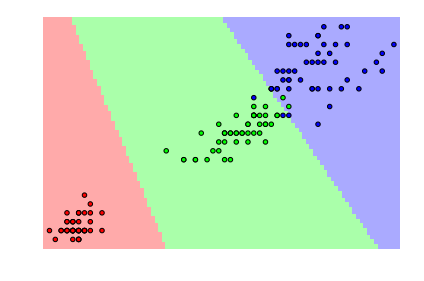

In [175]:
# Large Margin
import numpy as np
clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)


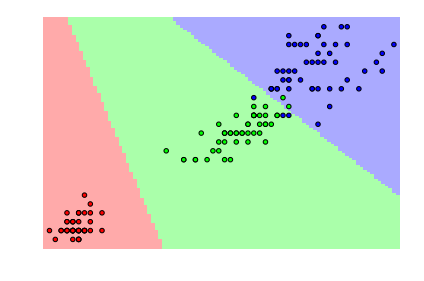

In [176]:
clf = svm.SVC(C=100000.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

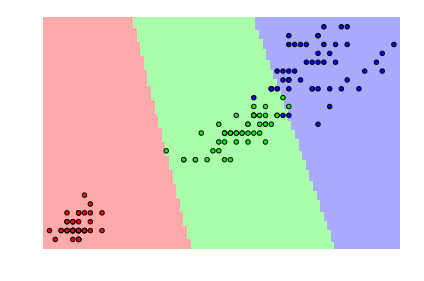

In [177]:
clf = svm.SVC(C=0.00001, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

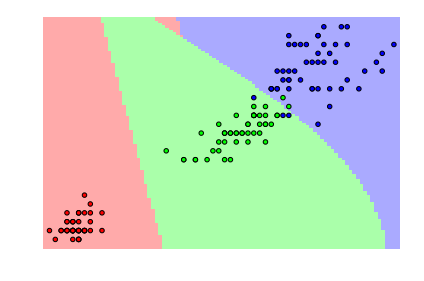

In [178]:
# Large Margin
import numpy as np
#?svm.SVC
# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
clf = svm.SVC(C=1.0, kernel='poly')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

In [219]:
random_state = np.random.RandomState(0)
random_state.randint(1,42,6)

array([ 1,  4,  4, 40, 10, 20])

In [203]:
X, Y = X[Y != 0], Y[Y != 0]
Y = Y-1 # for it takes binary label only
n_samples, n_features = X.shape


In [188]:
print X.shape
print Y.shape

(100, 2)
(100,)


In [189]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [190]:
print X_test.shape

(30, 2)


In [191]:
# Run classifier
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

In [192]:
print y_train.shape

(70,)


In [194]:
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.972851


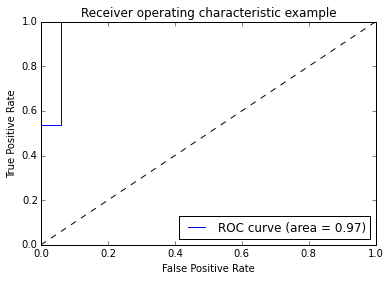

In [195]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()